In [42]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
import seaborn as sns
import pickle
import functools
import fastdtw
import scipy.spatial.distance as sd
#from datetime import datetime
consumption_df = pd.read_csv('Final Datasets/energy_consumption.csv')
consumption_df

,Unnamed: 0,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...,...
611013,123761,2020-05-19 19:00:00,3.060,28,0.014204,0.019235,0.034654,0.400690,0.001220
611014,123762,2020-05-19 20:00:00,2.940,28,0.013881,0.019240,0.033692,0.385105,0.001174
611015,123763,2020-05-19 21:00:00,1.970,28,0.011269,0.019278,0.025918,0.259123,0.000800
611016,123764,2020-05-19 22:00:00,2.130,28,0.011700,0.019272,0.027200,0.279904,0.000862


In [43]:
consumption_df = consumption_df[consumption_df['House Number'] == 1][['timestamp', 'energy_kWh']]
consumption_df['timestamp'] = pd.DatetimeIndex(consumption_df.timestamp)
consumption_df = consumption_df.set_index('timestamp')
consumption_df = consumption_df.resample("W").agg('sum')

<AxesSubplot:xlabel='timestamp'>

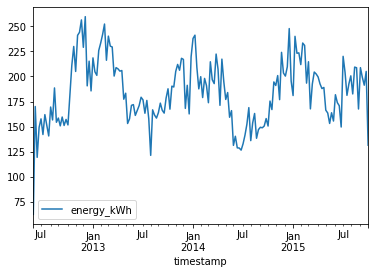

In [44]:
consumption_df.plot.line()

In [23]:
consumption_df = consumption_df[consumption_df['timestamp']< '2012-09-01']

In [21]:
consumption_df

,energy_kWh
timestamp,
2012-06-01 01:00:00,1.011
2012-06-01 02:00:00,0.451
2012-06-01 03:00:00,0.505
2012-06-01 04:00:00,0.441
2012-06-01 05:00:00,0.468
...,...
2012-08-31 19:00:00,1.002
2012-08-31 20:00:00,1.010
2012-08-31 21:00:00,1.020


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'